# Exploration initiale des images Microcoleus

Ce notebook a pour objectif de :
- Lister et afficher les images présentes dans le dossier de données.
- Vérifier la distribution des classes.
- Afficher quelques statistiques et exemples visuels.


## Imports & Paramètres

In [2]:
import os, random, yaml
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from src.config_utils import load_config

In [ ]:
# Charger la config
cfg = load_config('configs/config_baseline.yaml')

# Fixer les seeds
random.seed(cfg['seed'])
np.random.seed(cfg['seed'])

# Paramètres principaux
DATA_RAW = cfg['data']['raw_dir']
IMG_SIZE = tuple(cfg['preprocessing']['target_size'])

In [3]:
data_dir = DATA_RAW
classes  = [d for d in os.listdir(data_dir)
            if not d.startswith('.') and os.path.isdir(os.path.join(data_dir, d))]
print("Classes détectées :", classes)

Classes détectées : ['non_toxic', 'toxic']


## Images par classe

In [4]:
image_count = {}
for cls in classes:
    folder = os.path.join(data_dir, cls)
    image_count[cls] = len([f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))])
print("Nombre d'images par classe :", image_count)

Nombre d'images par classe : {'non_toxic': 66, 'toxic': 73}


## Distribution des classes

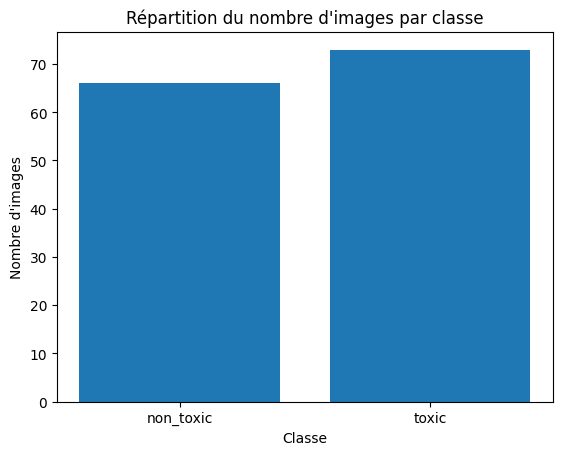

In [5]:
plt.bar(image_count.keys(), image_count.values())
plt.title("Répartition du nombre d'images par classe")
plt.xlabel("Classe")
plt.ylabel("Nombre d'images")
plt.show()

## Exemples d’images

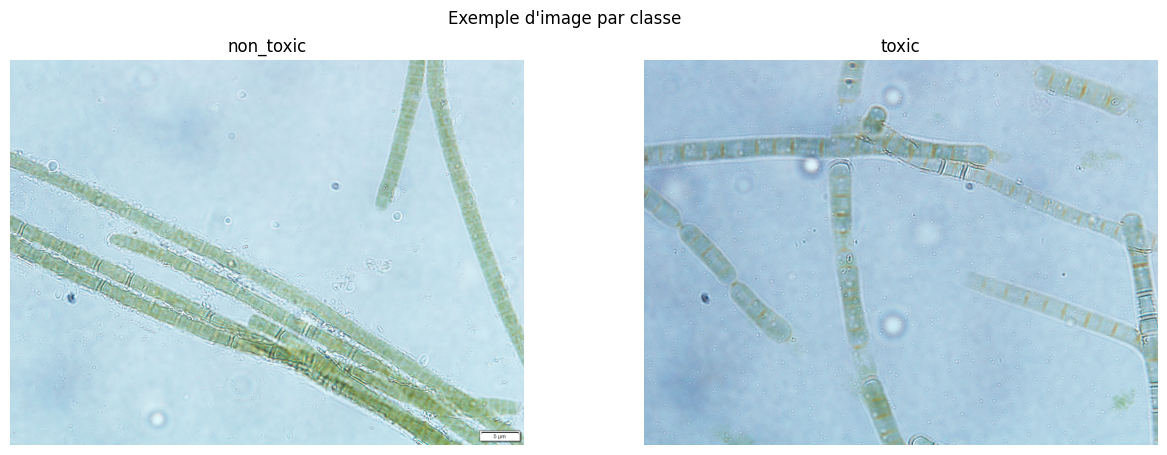

In [6]:
fig, axes = plt.subplots(1, min(5, len(classes)), figsize=(15, 5))
for i, cls in enumerate(classes[:5]):
    folder = os.path.join(data_dir, cls)
    img_files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))]
    if img_files:
        img = Image.open(os.path.join(folder, img_files[0]))
        axes[i].imshow(img)
        axes[i].set_title(cls)
        axes[i].axis("off")
plt.suptitle("Exemple d'image par classe")
plt.show()

## Statistiques additionnelles

Taille moyenne : 1600.0 x 1200.0


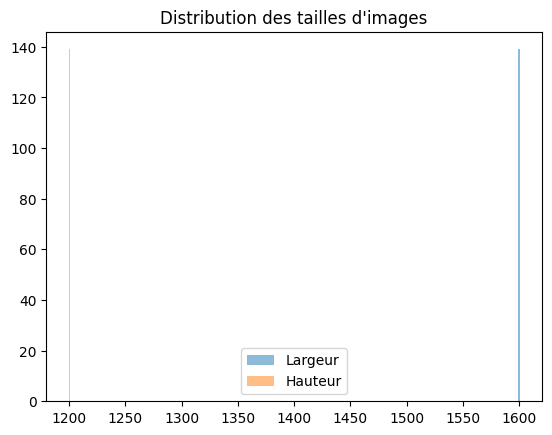

In [8]:
widths, heights = [], []
for cls in classes:
    folder = os.path.join(DATA_RAW, cls)
    img_files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))]
    for img_file in img_files:
        try:
            img = Image.open(os.path.join(folder, img_file))
            widths.append(img.width)
            heights.append(img.height)
        except Exception as e:
            print(f"Erreur lors de l'ouverture de {img_file} :", e)

print("Taille moyenne :", np.mean(widths), "x", np.mean(heights))

if len(set(widths)) == 1:
    plt.hist(widths, bins=1, alpha=0.5, label='Largeur')
else:
    plt.hist(widths, bins=20, alpha=0.5, label='Largeur')

if len(set(heights)) == 1:
    plt.hist(heights, bins=1, alpha=0.5, label='Hauteur')
else:
    plt.hist(heights, bins=20, alpha=0.5, label='Hauteur')

plt.legend()
plt.title("Distribution des tailles d'images")
plt.show()
